SVM and Neural Network approach
--
____
First we will create test and train datasets for further processing.
For start our data was stored in the following manner:
- DevanagariHandwrittenCharacterDataset
    - Test
        - digit_0
        - digit_1
        - ...
        - digit_9
    - Train
        - digit_0
        - digit_1
        - ...
        - digit_9

Every subfolder contains images of the corresponding digit and there is 1700 images of each digit in the train dataset and 3000 images of each digit in the test dataset so the ratio of images is 85% for the train dataset and 15% for the test dataset.

In [49]:
import os
import cv2 as cv
import numpy as np

X_train = []
y_train = []
X_test = []
y_test = []

# Traverse DevanagariHandwrittenCharacterDataset Test and Tran folders to create a dataset for learning
current_digit = 0
for i in range(10):
    for root, dirs, files in os.walk(f'DevanagariHandwrittenCharacterDataset/Test/digit_{i}'):
        print('Reading images from:', root)
        for file in files:
            # Read the image,convert it to grayscale and flatten it
            img = cv.cvtColor(cv.imread(os.path.join(root, file)), cv.COLOR_RGB2GRAY).flatten()
            # Add the image pixels to the test dataset
            X_test.append(img)
            y_test.append(current_digit)

    for root, dirs, files in os.walk(f'DevanagariHandwrittenCharacterDataset/Train/digit_{i}'):
        print('Reading images from:', root)
        for file in files:
            # Read the image,convert it to grayscale and flatten it
            img = cv.cvtColor(cv.imread(os.path.join(root, file)), cv.COLOR_RGB2GRAY).flatten()
            # Add the image pixels to the test dataset
            X_train.append(img)
            y_train.append(current_digit)
    current_digit += 1

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Get the indices of the train dataset
indices = np.arange(X_train.shape[0])
# Shuffle the indices
np.random.shuffle(indices)
# Shuffle the dataset using the shuffled indices
X_train = X_train[indices]
y_train = y_train[indices]

# Get the indices of the test dataset
indices = np.arange(X_test.shape[0])
# Shuffle the indices
np.random.shuffle(indices)
# Shuffle the dataset using the shuffled indices
X_test = X_test[indices]
y_test = y_test[indices]

print('Final shapes of the datasets:')
print('X_train:', X_train.shape, '\ny_train:', y_train.shape)
print('X_test:', X_test.shape, '\ny_test:', y_test.shape)

Reading images from: DevanagariHandwrittenCharacterDataset/Test/digit_0
Reading images from: DevanagariHandwrittenCharacterDataset/Train/digit_0
Reading images from: DevanagariHandwrittenCharacterDataset/Test/digit_1
Reading images from: DevanagariHandwrittenCharacterDataset/Train/digit_1
Reading images from: DevanagariHandwrittenCharacterDataset/Test/digit_2
Reading images from: DevanagariHandwrittenCharacterDataset/Train/digit_2
Reading images from: DevanagariHandwrittenCharacterDataset/Test/digit_3
Reading images from: DevanagariHandwrittenCharacterDataset/Train/digit_3
Reading images from: DevanagariHandwrittenCharacterDataset/Test/digit_4
Reading images from: DevanagariHandwrittenCharacterDataset/Train/digit_4
Reading images from: DevanagariHandwrittenCharacterDataset/Test/digit_5
Reading images from: DevanagariHandwrittenCharacterDataset/Train/digit_5
Reading images from: DevanagariHandwrittenCharacterDataset/Test/digit_6
Reading images from: DevanagariHandwrittenCharacterDataset

We are traversing through the dataset folders and reading the images, converting them to grayscale and flattening them so every row in the dataset represents all 1024 pixels of the image (32x32) treated as individual features after every image added to the dataset we are also adding the corresponding label to the label dataset.
Then we are doing the same for the test dataset images.
Finally, we are shuffling the datasets and printing their shapes to check if everything is in order.

As we have our datasets ready we can start with the SVM approach

In [50]:
from sklearn.svm import SVC

# Create basic SVM model
svm_model = SVC(kernel='linear')
# Fit the model
svm_model.fit(X_train, y_train)
# Get the accuracy of the model
accuracy = svm_model.score(X_test, y_test)
print('Accuracy of the SVM model:', accuracy)

Accuracy of the SVM model: 0.9563333333333334


First we used SVM model with linear kernel from the sklearn library. The accuracy can be seen above. Let's also see other metrics. To do this let's define a function that will print some predictions on actual test set, the confusion matrix and f1 score.

10 random predictions on the test set:


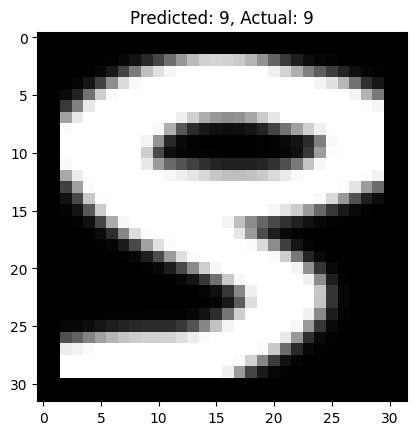

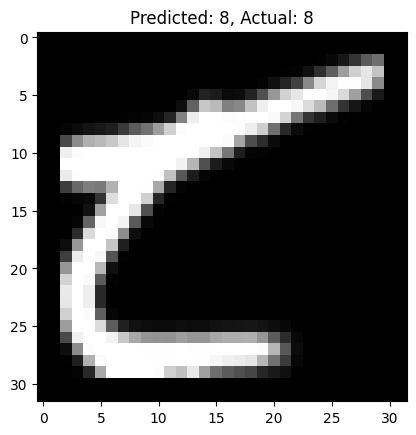

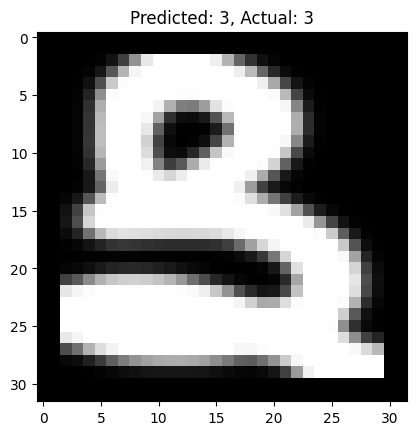

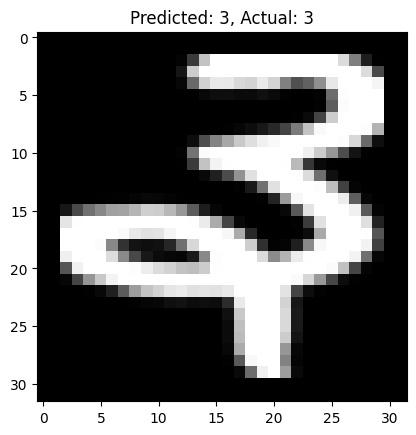

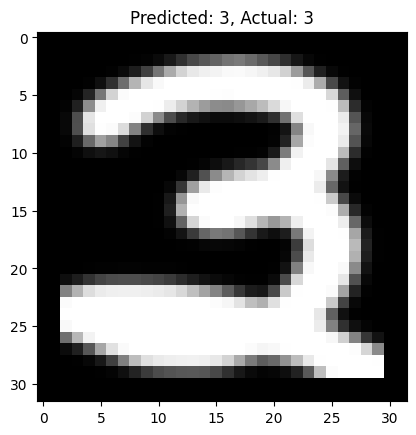

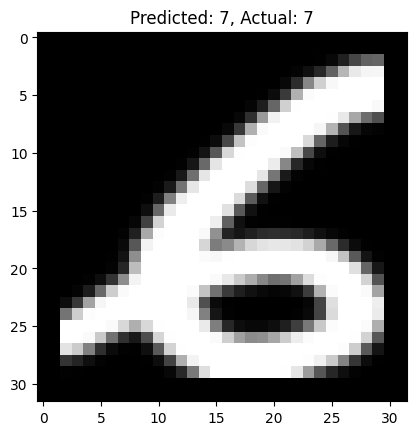

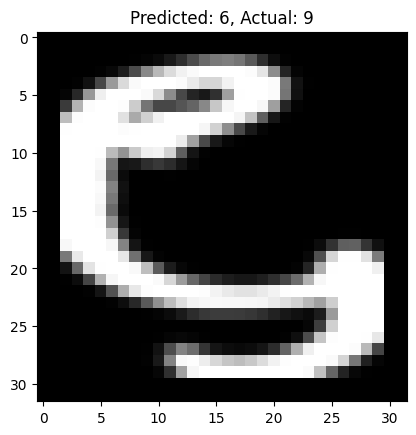

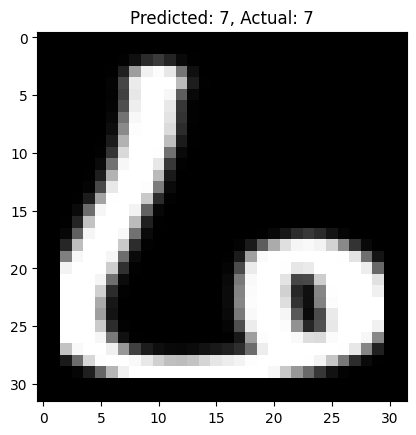

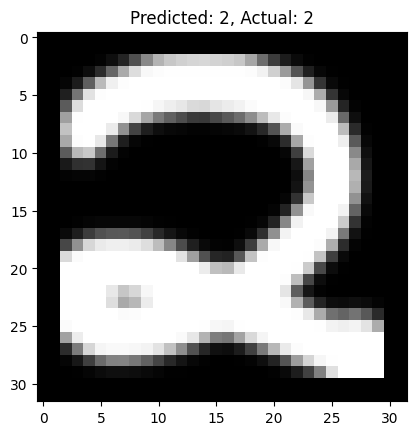

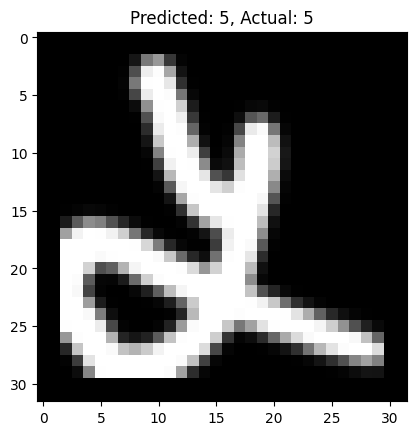

Confusion matrix (X - predicted, Y - actual):
[[300   0   0   0   0   0   0   0   0   0]
 [  0 296   0   0   0   0   1   1   0   2]
 [  1   2 269  25   1   1   0   1   0   0]
 [  0   0  43 252   0   2   1   2   0   0]
 [  0   0   0   1 296   2   1   0   0   0]
 [  0   0   4   2   5 286   2   1   0   0]
 [  0   1   2   2   0   0 291   3   1   0]
 [  6   0   1   0   1   3   2 287   0   0]
 [  0   0   0   0   0   0   0   0 300   0]
 [  4   0   1   0   0   0   2   0   1 292]]
F1 score: 0.9563301346657066


In [51]:
from sklearn.metrics import confusion_matrix, f1_score
import matplotlib.pyplot as plt

def show_other_metrics(model, test_features, test_labels, is_tf_model=True):
    # Get the predictions
    predictions = model.predict(test_features)
    if is_tf_model:
        predictions = np.argmax(predictions, axis=1)  # Convert probabilities to class labels

    print('10 random predictions on the test set:')
    for i in range(10):
        n = np.random.randint(0, test_features.shape[0])
        plt.imshow(test_features[n].reshape(32, 32), cmap='gray')
        plt.title(f'Predicted: {predictions[n]}, Actual: {y_test[n]}')
        plt.show()
    print('Confusion matrix (X - predicted, Y - actual):')
    print(confusion_matrix(test_labels, predictions))
    print('F1 score:', f1_score(test_labels, predictions, average='weighted'))

show_other_metrics(svm_model, X_test, y_test, False)

After the basic model we tried the SVM with standard scaler and rbf kernel

Accuracy of the SVM model with a pipeline: 0.9916666666666667
10 random predictions on the test set:


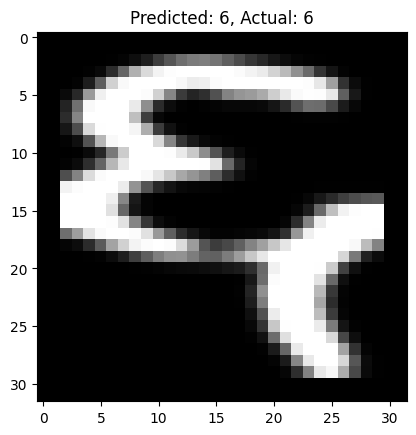

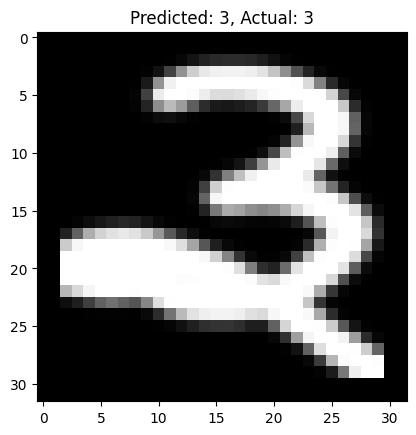

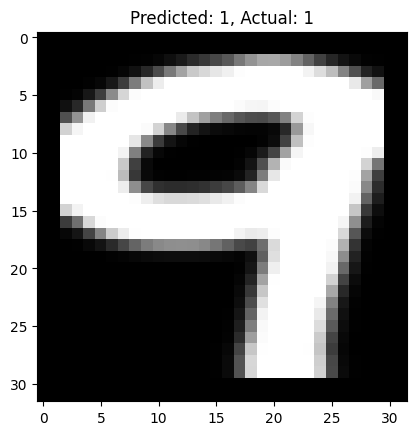

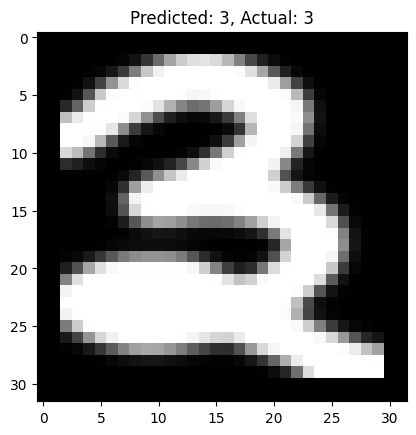

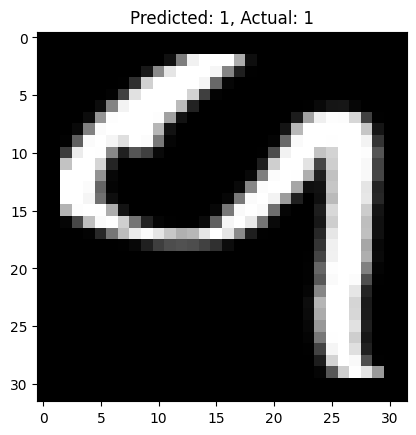

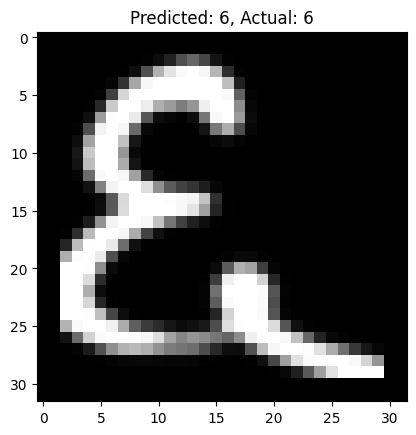

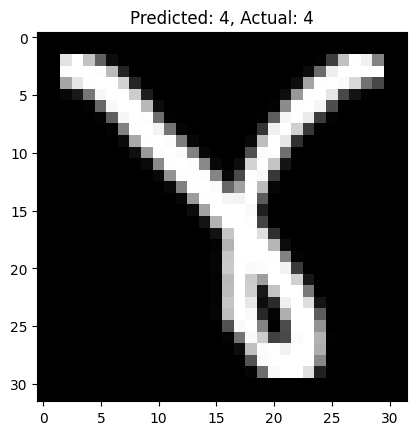

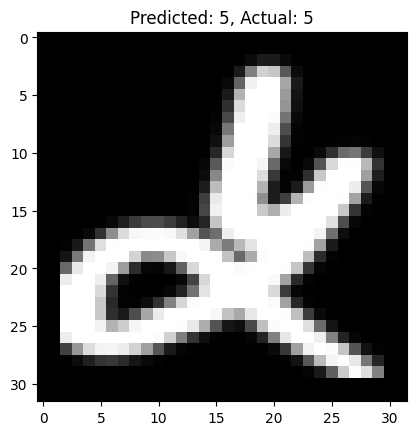

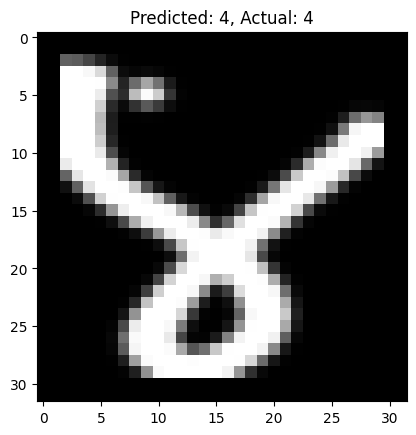

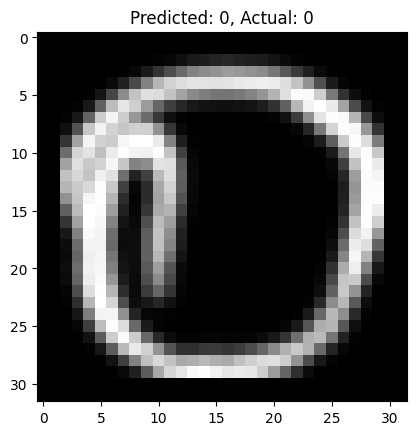

Confusion matrix (X - predicted, Y - actual):
[[299   0   0   0   0   0   0   1   0   0]
 [  0 299   0   0   0   0   0   0   1   0]
 [  0   0 295   3   0   1   0   0   0   1]
 [  0   0   7 293   0   0   0   0   0   0]
 [  0   0   0   0 299   1   0   0   0   0]
 [  0   0   2   0   1 296   1   0   0   0]
 [  0   1   0   0   0   0 298   1   0   0]
 [  0   0   0   0   0   2   0 298   0   0]
 [  0   0   0   0   0   0   0   0 300   0]
 [  0   0   1   0   0   0   1   0   0 298]]
F1 score: 0.9916753064908953


In [52]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Create SVM model with StandardScaler and other kernel
svm_pipeline_model = make_pipeline(StandardScaler(), SVC(kernel='rbf'))
# Fit the model
svm_pipeline_model.fit(X_train, y_train)
# Get the accuracy of the model
accuracy = svm_pipeline_model.score(X_test, y_test)
print('Accuracy of the SVM model with a pipeline:', accuracy)

show_other_metrics(svm_pipeline_model, X_test, y_test, False)

The accuracy and f1 score are better with the pipeline model by approximately 3.5%

___

After SVM we tried the Neural Network approach

Epoch 1/15


C:\Users\jpodk\anaconda3\envs\general-uni-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


425/425 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 23.9423 - sparse_categorical_accuracy: 0.7891 - val_loss: 2.1514 - val_sparse_categorical_accuracy: 0.9185
Epoch 2/15
425/425 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 1.0320 - sparse_categorical_accuracy: 0.9479 - val_loss: 0.9141 - val_sparse_categorical_accuracy: 0.9582
Epoch 3/15
425/425 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.6150 - sparse_categorical_accuracy: 0.9644 - val_loss: 0.8908 - val_sparse_categorical_accuracy: 0.9582
Epoch 4/15
425/425 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.6684 - sparse_categorical_accuracy: 0.9695 - val_loss: 1.2564 - val_sparse_categorical_accuracy: 0.9359
Epoch 5/15
425/425 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.5168 - sparse_categorical_accuracy: 0.9718 - val_loss: 0.8382 - val_sparse_categorical_accuracy: 0.9600
Epoch 6/15
425/425 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.3537 - sparse_categorical_accuracy: 0.9794 - val_loss: 0.7602 - val_sparse_categorical_accuracy: 0.9615
Epoch 7/15
4

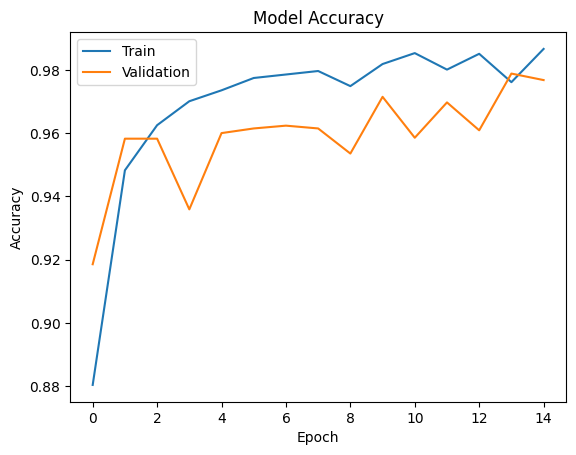

Max train accuracy values throughout history:
0.9866176247596741
The epoch with the highest train accuracy:
15
Max validation accuracy values throughout history:
0.9788235425949097
The epoch with the highest validation accuracy:
14
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
10 random predictions on the test set:


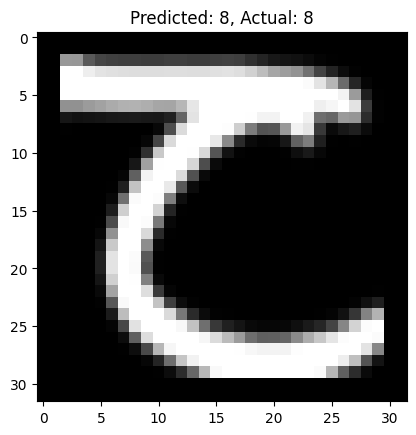

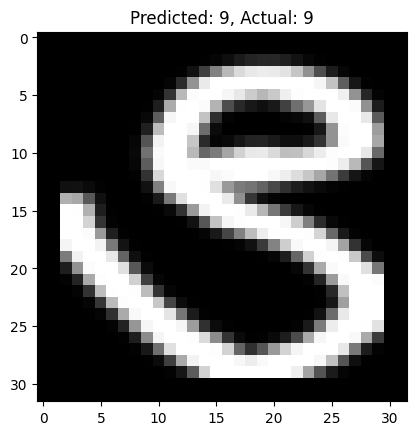

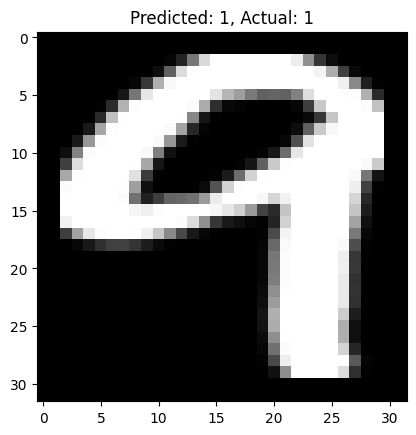

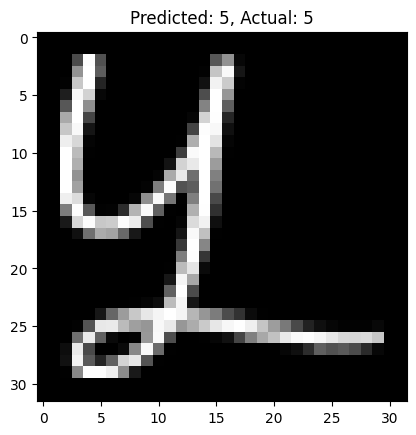

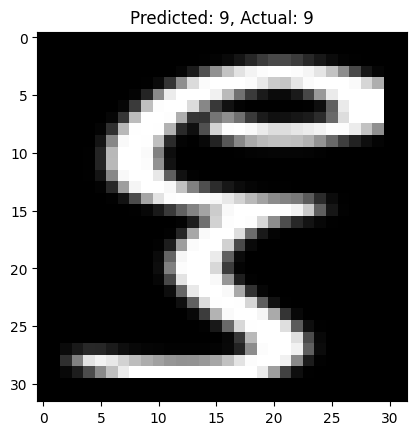

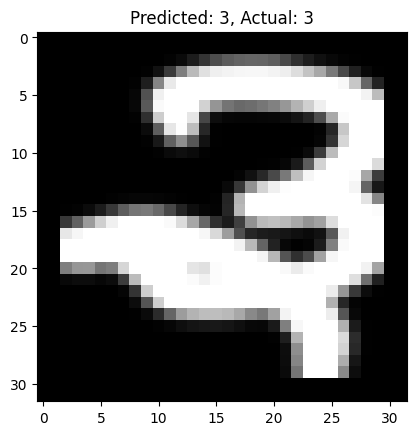

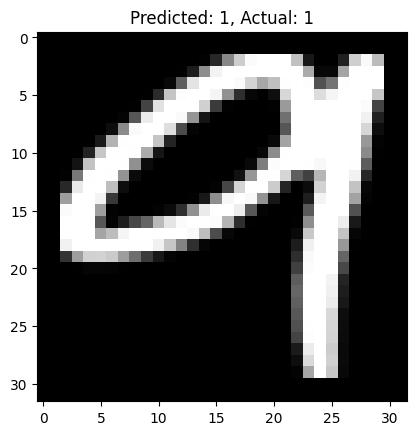

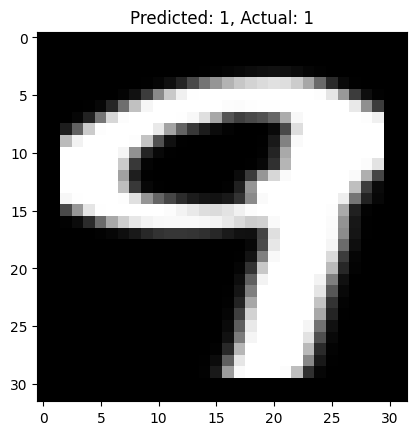

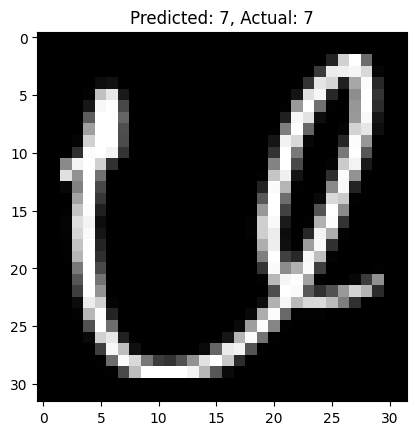

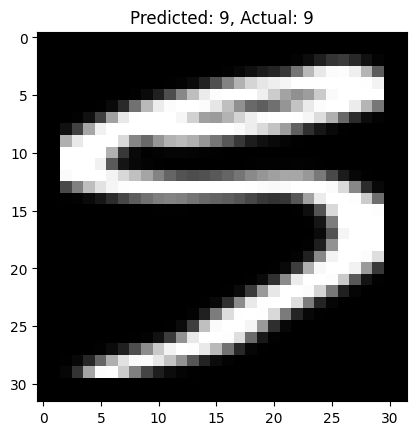

Confusion matrix (X - predicted, Y - actual):
[[300   0   0   0   0   0   0   0   0   0]
 [  2 298   0   0   0   0   0   0   0   0]
 [  0   3 285   7   1   1   1   2   0   0]
 [  0   1  13 268   0  13   2   1   0   2]
 [  0   0   0   0 295   3   0   2   0   0]
 [  0   0   1   2   0 295   0   1   1   0]
 [  0   1   2   1   1   0 282   8   1   4]
 [  1   0   0   0   1   1   0 297   0   0]
 [  0   0   0   0   0   0   0   0 300   0]
 [  2   0   0   0   0   0   0   0   1 297]]
F1 score: 0.9721362363006689


In [53]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, optimizers, losses, metrics

# Add validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

nn_model_basic = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(1024,)),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

nn_model_basic.compile(optimizer=optimizers.Adam(), loss=losses.sparse_categorical_crossentropy,
                       metrics=['sparse_categorical_accuracy'])
history = nn_model_basic.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_val, y_val))

print('Accuracy of the basic neural network model:', nn_model_basic.evaluate(X_test, y_test)[1])

def show_history(history):
    # Show history of the model
    plt.plot(history.history['sparse_categorical_accuracy'])
    plt.plot(history.history['val_sparse_categorical_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    plt.show()
    
    # Show accuracy values throughout history
    print('Max train accuracy values throughout history:')
    print(np.max(history.history['sparse_categorical_accuracy']))
    print('The epoch with the highest train accuracy:')
    print(np.argmax(history.history['sparse_categorical_accuracy']) + 1)
    print('Max validation accuracy values throughout history:')
    print(np.max(history.history['val_sparse_categorical_accuracy']))
    print('The epoch with the highest validation accuracy:')
    print(np.argmax(history.history['val_sparse_categorical_accuracy']) + 1)
    
show_history(history)
show_other_metrics(nn_model_basic, X_test, y_test)

Model was basic neural network with 2 hidden layers and 512 and 256 neurons respectively. We were learning for 6 epochs witch batches of size 32 and with validation on set of size 0.2 of training set.

Let's try to improve the model by adding dropout layers. Every dropout layer will have 0.2 dropout rate.

Epoch 1/15


C:\Users\jpodk\anaconda3\envs\general-uni-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


425/425 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.3480 - sparse_categorical_accuracy: 0.9824 - val_loss: 0.8012 - val_sparse_categorical_accuracy: 0.9685
Epoch 2/15
425/425 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.2530 - sparse_categorical_accuracy: 0.9852 - val_loss: 0.9661 - val_sparse_categorical_accuracy: 0.9682
Epoch 3/15
425/425 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.3430 - sparse_categorical_accuracy: 0.9863 - val_loss: 0.5338 - val_sparse_categorical_accuracy: 0.9724
Epoch 4/15
425/425 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.2010 - sparse_categorical_accuracy: 0.9869 - val_loss: 0.7782 - val_sparse_categorical_accuracy: 0.9688
Epoch 5/15
425/425 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.2472 - sparse_categorical_accuracy: 0.9851 - val_loss: 0.6199 - val_sparse_categorical_accuracy: 0.9744
Epoch 6/15
425/425 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.2591 - sparse_categorical_accuracy: 0.9876 - val_loss: 0.8349 - val_sparse_categorical_accuracy: 0.9632
Epoch 7/15
425

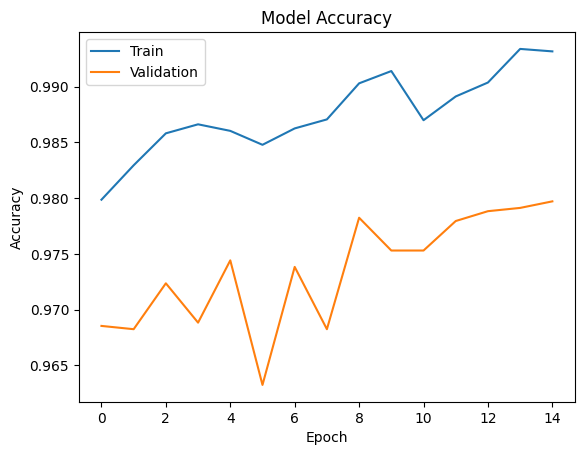

Max train accuracy values throughout history:
0.9933823347091675
The epoch with the highest train accuracy:
14
Max validation accuracy values throughout history:
0.9797058701515198
The epoch with the highest validation accuracy:
15
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
10 random predictions on the test set:


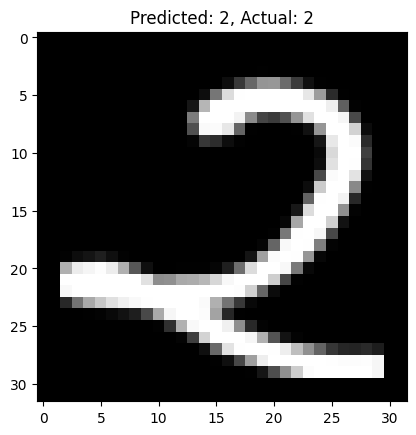

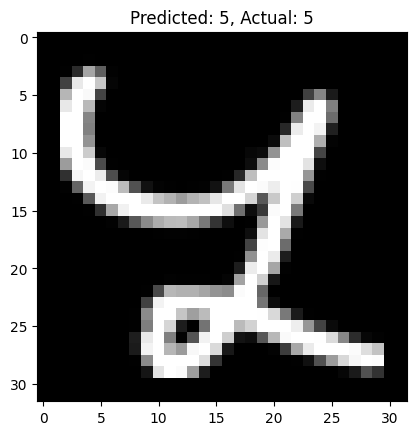

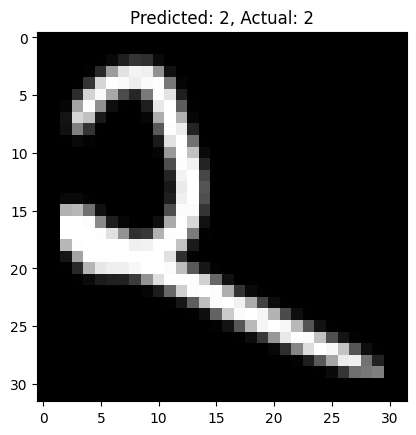

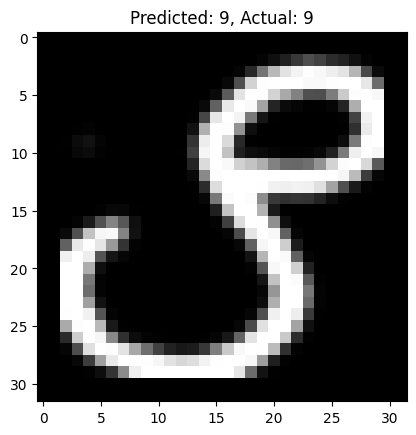

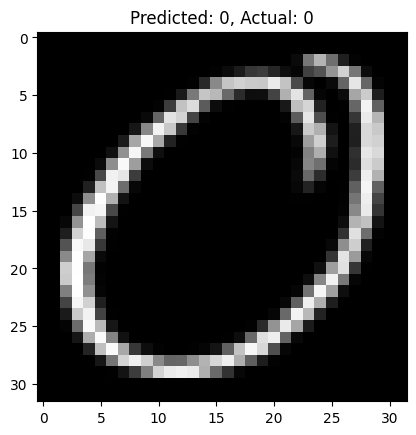

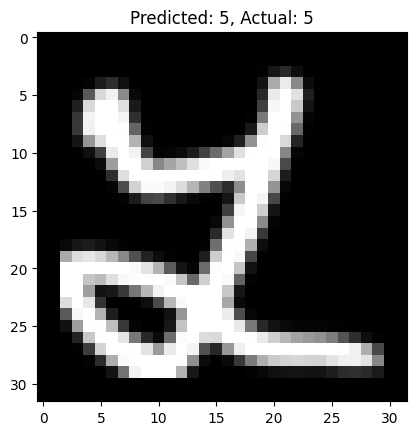

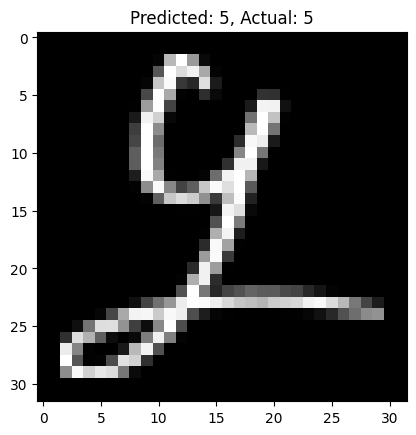

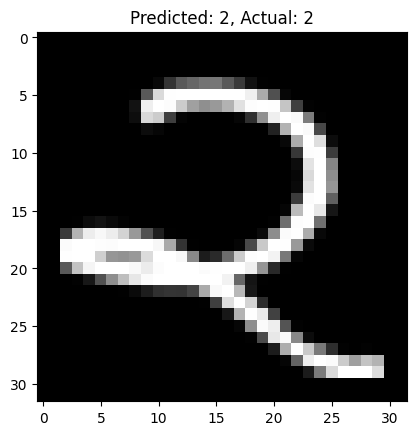

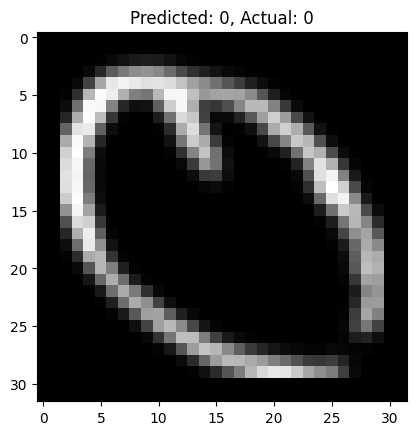

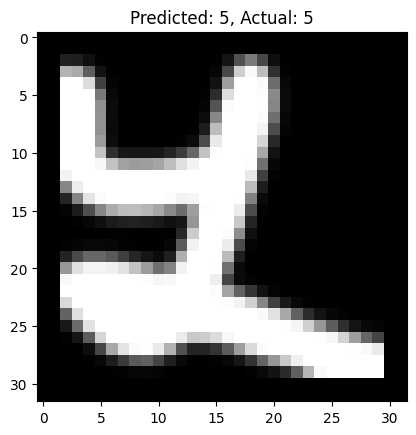

Confusion matrix (X - predicted, Y - actual):
[[300   0   0   0   0   0   0   0   0   0]
 [  0 299   0   0   0   0   0   0   1   0]
 [  0   1 289   4   4   0   1   0   0   1]
 [  0   3  25 266   0   2   1   1   0   2]
 [  0   0   0   0 299   1   0   0   0   0]
 [  0   0   8   0   5 286   1   0   0   0]
 [  0   1   1   0   0   0 295   2   0   1]
 [  2   0   0   0   1   3   0 294   0   0]
 [  0   0   0   0   0   0   0   0 300   0]
 [  0   0   0   2   1   0   0   0   2 295]]
F1 score: 0.9742673372100922


In [54]:
nn_model_dropout = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(1024,)),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

nn_model_basic.compile(optimizer=optimizers.Adam(), loss=losses.sparse_categorical_crossentropy,
                       metrics=[metrics.sparse_categorical_accuracy])
history = nn_model_basic.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_val, y_val))

print('Accuracy of the neural network model with dropout:', nn_model_basic.evaluate(X_test, y_test)[1])

show_history(history)
show_other_metrics(nn_model_basic, X_test, y_test)

The model is slightly better than the basic model. Even with the effect of overfitting the model.

Let's try to normalize the input data and see if it will improve the model. After the normalization layer we will add batch normalization layers after every hidden layer. The dropout layers stay the same and the learning parameters so the number of epochs, batch size and validation set are the same as in the previous model.

Epoch 1/15
425/425 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 0.4525 - sparse_categorical_accuracy: 0.8566 - val_loss: 0.0761 - val_sparse_categorical_accuracy: 0.9779
Epoch 2/15
425/425 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0891 - sparse_categorical_accuracy: 0.9702 - val_loss: 0.0621 - val_sparse_categorical_accuracy: 0.9824
Epoch 3/15
425/425 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0544 - sparse_categorical_accuracy: 0.9826 - val_loss: 0.0625 - val_sparse_categorical_accuracy: 0.9821
Epoch 4/15
425/425 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0375 - sparse_categorical_accuracy: 0.9880 - val_loss: 0.0609 - val_sparse_categorical_accuracy: 0.9853
Epoch 5/15
425/425 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0407 - sparse_categorical_accuracy: 0.9862 - val_loss: 0.0660 - val_sparse_categorical_accuracy: 0.9832
Epoch 6/15
425/425 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0311 - sparse_categorical_accuracy: 0.9901 - val_loss: 0.0614 - val_sparse_categorical_accuracy: 0.9844

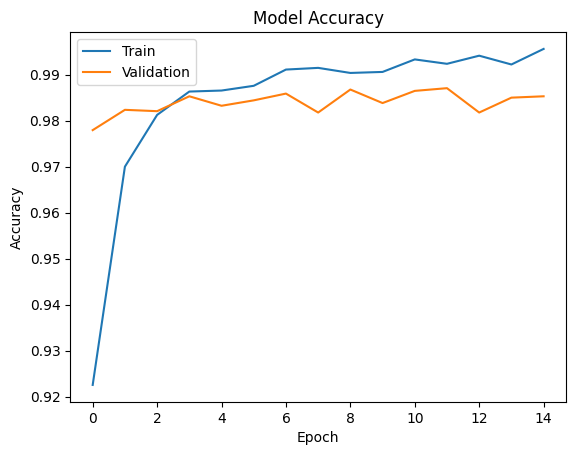

Max train accuracy values throughout history:
0.9955882430076599
The epoch with the highest train accuracy:
15
Max validation accuracy values throughout history:
0.9870588183403015
The epoch with the highest validation accuracy:
12
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
10 random predictions on the test set:


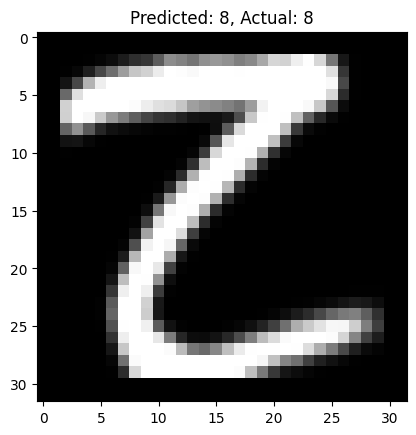

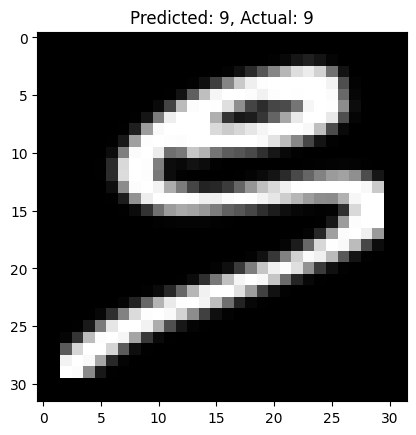

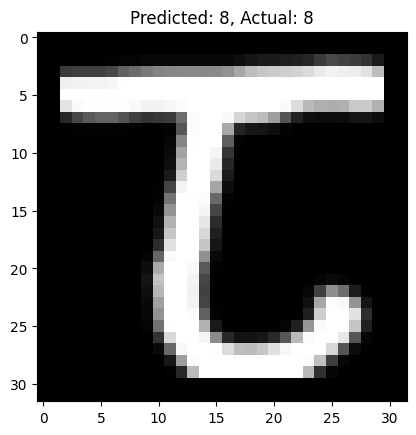

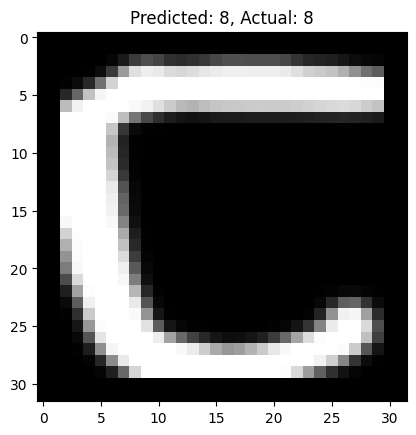

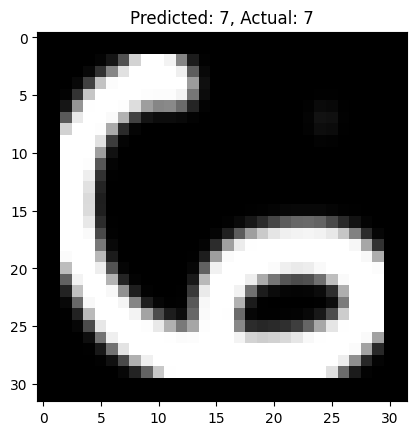

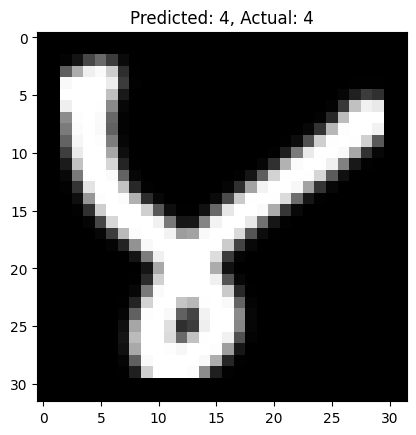

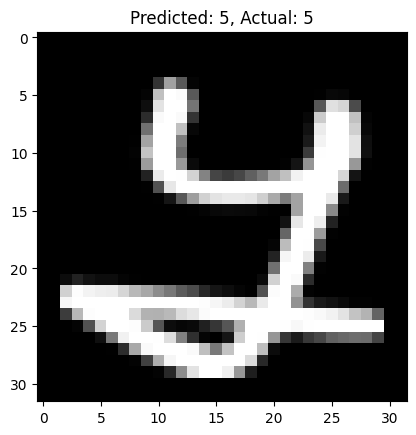

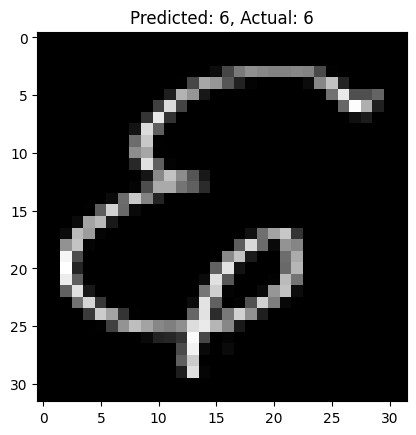

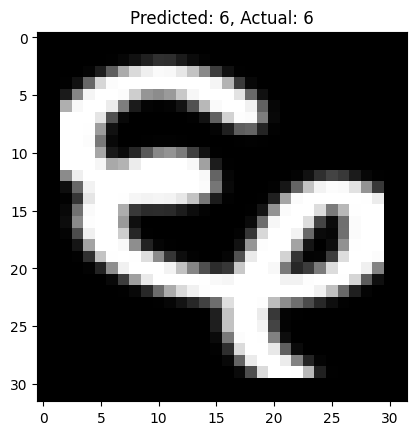

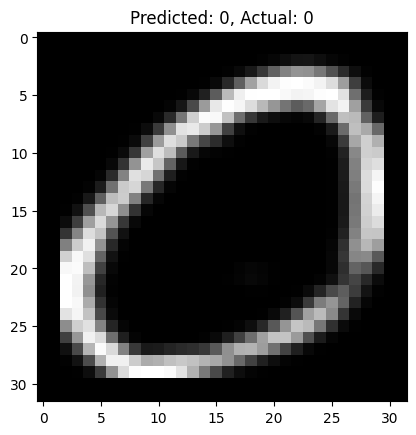

Confusion matrix (X - predicted, Y - actual):
[[300   0   0   0   0   0   0   0   0   0]
 [  0 298   0   0   0   1   0   0   1   0]
 [  0   2 295   2   0   1   0   0   0   0]
 [  0   0   4 294   0   2   0   0   0   0]
 [  0   1   0   0 296   3   0   0   0   0]
 [  0   0   0   2   0 298   0   0   0   0]
 [  0   1   0   0   0   1 297   1   0   0]
 [  0   1   0   0   1   2   0 296   0   0]
 [  0   0   0   0   0   0   0   0 300   0]
 [  0   0   0   0   1   0   0   0   1 298]]
F1 score: 0.9906806564016839


In [55]:
# Create and adapt the normalization layer
normalizer = layers.Normalization()
normalizer.adapt(X_train)

nn_model_norm = models.Sequential([
    layers.Input(shape=(1024,)),
    normalizer,
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

nn_model_norm.compile(optimizer=optimizers.Adam(), loss=losses.sparse_categorical_crossentropy,
                      metrics=[metrics.sparse_categorical_accuracy])

history = nn_model_norm.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_val, y_val))

print('Accuracy of the neural network model with normalization and batch normalization:', nn_model_norm.evaluate(X_test, y_test)[1])

show_history(history)
show_other_metrics(nn_model_norm, X_test, y_test)

The model is slightly better than the model with dropout layers, so it's even better than basic model we tried.

C:\Users\jpodk\anaconda3\envs\general-uni-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 18.8187 - sparse_categorical_accuracy: 0.8054 - val_loss: 1.1918 - val_sparse_categorical_accuracy: 0.9391
Epoch 2/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.9967 - sparse_categorical_accuracy: 0.9527 - val_loss: 1.3981 - val_sparse_categorical_accuracy: 0.9491
Epoch 3/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.5514 - sparse_categorical_accuracy: 0.9679 - val_loss: 0.8278 - val_sparse_categorical_accuracy: 0.9597
Epoch 4/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.5176 - sparse_categorical_accuracy: 0.9698 - val_loss: 0.5490 - val_sparse_categorical_accuracy: 0.9703
Epoch 5/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.3031 - sparse_categorical_accuracy: 0.9790 - val_loss: 0.5118 - val_sparse_categorical_accuracy: 0.9703
Epoch 6/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.3183 - sparse_categorical_accuracy: 0.9776 - val_loss: 0.3628 - val_sparse_categorical_accuracy: 0.9747

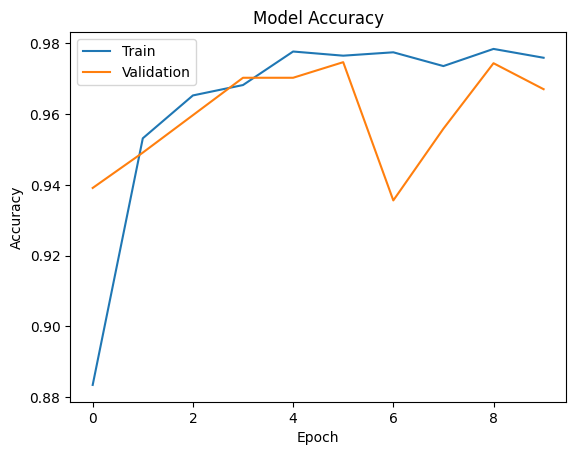

Max train accuracy values throughout history:
0.9784559011459351
The epoch with the highest train accuracy:
9
Max validation accuracy values throughout history:
0.9747058749198914
The epoch with the highest validation accuracy:
6
Epoch 1/9
425/425 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 25.2156 - sparse_categorical_accuracy: 0.7325 - val_loss: 1.2892 - val_sparse_categorical_accuracy: 0.9362
Epoch 2/9
425/425 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 2.2145 - sparse_categorical_accuracy: 0.8998 - val_loss: 0.4496 - val_sparse_categorical_accuracy: 0.9482
Epoch 3/9
425/425 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.8379 - sparse_categorical_accuracy: 0.9296 - val_loss: 0.3292 - val_sparse_categorical_accuracy: 0.9641
Epoch 4/9
425/425 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.7397 - sparse_categorical_accuracy: 0.9349 - val_loss: 0.2000 - val_sparse_categorical_accuracy: 0.9676
Epoch 5/9
425/425 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.5064 - sparse_categorical_accuracy: 0.9377 

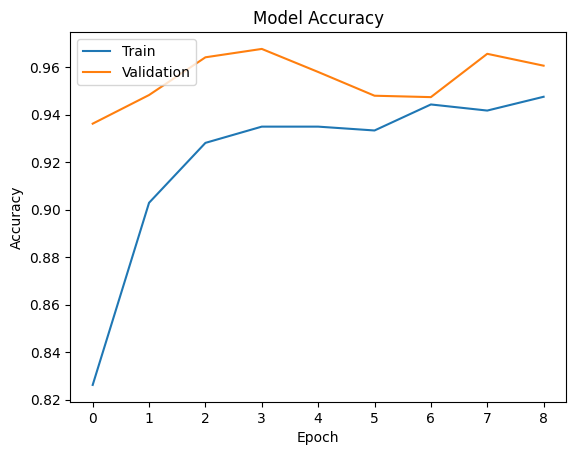

Max train accuracy values throughout history:
0.9474999904632568
The epoch with the highest train accuracy:
9
Max validation accuracy values throughout history:
0.9676470756530762
The epoch with the highest validation accuracy:
4
Epoch 1/5
425/425 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 0.4730 - sparse_categorical_accuracy: 0.8549 - val_loss: 0.0725 - val_sparse_categorical_accuracy: 0.9791
Epoch 2/5
425/425 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0848 - sparse_categorical_accuracy: 0.9718 - val_loss: 0.0669 - val_sparse_categorical_accuracy: 0.9838
Epoch 3/5
425/425 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.0516 - sparse_categorical_accuracy: 0.9838 - val_loss: 0.0550 - val_sparse_categorical_accuracy: 0.9853
Epoch 4/5
425/425 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 0.0416 - sparse_categorical_accuracy: 0.9860 - val_loss: 0.0566 - val_sparse_categorical_accuracy: 0.9850
Epoch 5/5
425/425 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0395 - sparse_categorical_accuracy: 0.9866 -

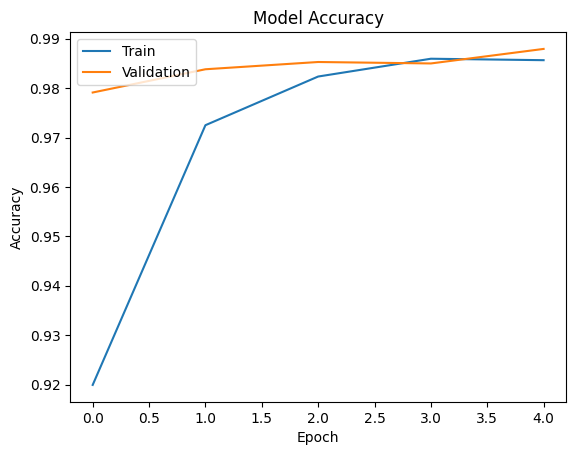

Max train accuracy values throughout history:
0.9859558939933777
The epoch with the highest train accuracy:
4
Max validation accuracy values throughout history:
0.9879412055015564
The epoch with the highest validation accuracy:
5


In [56]:
# Train neural networks once again for the number of epochs that gave the best results
nn_model_basic = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(1024,)),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

nn_model_dropout = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(1024,)),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

normalizer = layers.Normalization()
normalizer.adapt(X_train)

nn_model_norm = models.Sequential([
    layers.Input(shape=(1024,)),
    normalizer,
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

nn_model_basic.compile(optimizer=optimizers.Adam(), loss=losses.sparse_categorical_crossentropy,
                       metrics=[metrics.sparse_categorical_accuracy])
nn_model_dropout.compile(optimizer=optimizers.Adam(), loss=losses.sparse_categorical_crossentropy,
                         metrics=[metrics.sparse_categorical_accuracy])
nn_model_norm.compile(optimizer=optimizers.Adam(), loss=losses.sparse_categorical_crossentropy,
                      metrics=[metrics.sparse_categorical_accuracy])

history = nn_model_basic.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))
print('Accuracy of the basic neural network model:', nn_model_basic.evaluate(X_test, y_test)[1])
show_history(history)

history = nn_model_dropout.fit(X_train, y_train, epochs=9, batch_size=32, validation_data=(X_val, y_val))
print('Accuracy of the neural network model with dropout:', nn_model_dropout.evaluate(X_test, y_test)[1])
show_history(history)

history = nn_model_norm.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))
print('Accuracy of the neural network model with normalization:', nn_model_norm.evaluate(X_test, y_test)[1])
show_history(history)